# Football Analytics - 2018 World Cup Squad

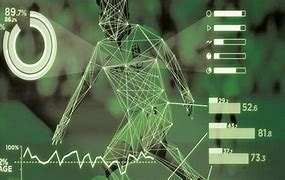

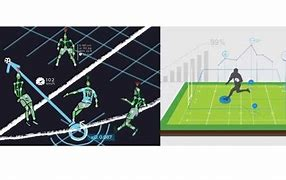

## Scenario:

The year was 2018 and the [FIFA](https://www.fifa.com) World Cup that year was hosted by Russia. The world cup 2018 squad dataset was handed over to explore. As a Data Analyst in the Analytics team of a Football Academy company, my task was to uncover some hidden insights to help to optimize the scouting decisions of the business.  

The Director of Football Analytics will like to know the extent of insights that can be uncovered from the dataset and make recommendations to improve and optimize scouting strategies of the firm. The dataset can be gotten [here](https://docs.google.com/spreadsheets/d/1j9zC5XL1CZk0qtTSOG8RHLy5ccs7SuT_/edit?usp=sharing&ouid=112974562005478222974&rtpof=true&sd=true) and you can follow along to explore the data. 

## Objectives:

* What hypothesis can be formed from this data?

  - Is there any attribute in this data that has any effect on players profile? (caps and number of goals). 
  
  - Hypothetically, it is assumed that age has an effect on players profile (in terms of caps and number of goals). 
  
  *Hypothesis: Does the hypothesis hold true that age has effect on players profile (caps and no of goals)?*
  

* Some likely questions that might interest the stakeholders from this data:
  
  - Is there any correlation between 'goals', 'age' and 'caps'?
  
  - Can we get the names of the countries belonging to each group?
  
  - Is there any relationship between players position and number of goals scored?
  
  - Which group has the highest number of goals?
  
  - Who are the 10 most-capped players in the FIFA 2018 World Cup?
  
  - Which of the clubs has the highest number of players represented at the 2018 world cup?
  
  - Which country scored the highest number of goals at world cup tournaments to date as at world cup 2018?
  
  - Who are the top 5 best players in the world as at 2018, based on number of goals scored by their countries in world cup tournaments to date?
  
  - For scouting purpose, identify 5 best players per position based on goal-output and/or number of caps.

### Things we may need to do:

* Change the column titles to lower cases

* We may need to change the data type for 'DOB' column to datetime in order to make the data suitable for our analysis

* Split 'country and club' into 2 separate columns: 'country' and 'club'

* Drop the original 'country' column and replace 'team' with 'country'

* There seems to be duplicate values in the dataset when we check with 'type' column, we have the same sets of values and information for the players in 'age' and 'caps' categories.

* We can get player's age from the 'DOB' column: get 'age' from 'year' part of 'DOB' by substracting the 'year' from the base year (2018)

### Approaches:

This is the way I would approach this project: 

1. Data Cleaning

2. Explorative Data Analysis

3. Scouting Analysis

4. Insights and Recommendations

5. Conclusion

### Import the necessary packages for the task:

In [1]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

### 1. Data Cleaning

I noticed some tidiness and quality issues in the data. So, let's clean it up a bit!

In [2]:
# Read in the dataset
squads = pd.read_excel(r"C:\Users\user\OneDrive\Desktop\Data Science Projects\world_cup_2018_squads.xlsx")

# Check the first 10 rows
squads.head(10)

,Type,Team,Group,Position,Name,DOB,Caps,Goals,Country and Club
0,Age,Egypt,A,DF,Ahmed Elmohamady,1987-09-09,76,2,England Aston Villa
1,Age,Egypt,A,DF,Ahmed Fathy,1984-11-10,124,3,Egypt Al Ahly
2,Age,Egypt,A,DF,Ahmed Hegazi,1991-01-25,43,1,England West Bromwich Albion
3,Age,Egypt,A,DF,Ali Gabr,1993-07-28,20,1,England West Bromwich Albion
4,Age,Egypt,A,DF,Ayman Ashraf,1991-04-09,4,0,Egypt Al Ahly
5,Age,Egypt,A,DF,Mahmoud Hamdy,1995-06-01,0,0,Egypt Zamalek
6,Age,Egypt,A,DF,Mohamed Abdel-Shafy,1985-07-01,49,1,Saudi Arabia Al Fateh
7,Age,Egypt,A,DF,Omar Gaber,1992-01-30,23,0,United States Los Angeles FC
8,Age,Egypt,A,DF,Saad Samir,1989-04-01,10,0,Egypt Al Ahly
9,Age,Egypt,A,FW,Marwan Mohsen,1989-02-26,22,4,Egypt Al Ahly


In [3]:
# Check the last 10 rows
squads.tail(10)

,Type,Team,Group,Position,Name,DOB,Caps,Goals,Country and Club
1462,Caps,Senegal,H,FW,Moussa Sow,1986-01-19,50,18,Turkey Bursaspor
1463,Caps,Senegal,H,FW,Sadio Mané,1992-04-10,51,14,England Liverpool
1464,Caps,Senegal,H,GK,Abdoulaye Diallo,1992-03-30,16,0,France Rennes
1465,Caps,Senegal,H,GK,Alfred Gomis,1984-05-31,1,0,Italy SPAL
1466,Caps,Senegal,H,GK,Khadim N'Diaye,1985-04-05,25,0,Guinea Horoya
1467,Caps,Senegal,H,MF,Alfred N'Diaye,1990-03-06,18,0,England Wolverhampton Wanderers
1468,Caps,Senegal,H,MF,Badou Ndiaye,1990-10-27,17,1,England Stoke City
1469,Caps,Senegal,H,MF,Cheikh N'Doye,1986-03-29,23,3,England Birmingham City
1470,Caps,Senegal,H,MF,Cheikhou Kouyaté (captain),1989-12-21,46,2,England West Ham United
1471,Caps,Senegal,H,MF,Idrissa Gueye,1989-09-26,58,1,England Everton


In [4]:
# Check the dimensions of the data
squads.shape

(1472, 9)

There are 1,472 rows and 9 columns in the data

In [5]:
# Size of the data
squads.size

13248

In [6]:
# Descriptive statistics
squads.describe()

,Caps,Goals
count,1472.000000,1472.000000
mean,33.745924,4.391304
std,31.777299,8.641772
min,0.000000,0.000000
25%,9.000000,0.000000
50%,23.500000,1.000000
75%,51.000000,5.000000
max,156.000000,81.000000


In [7]:
# Check the columns
squads.columns

Index(['Type', 'Team', 'Group', 'Position', 'Name', 'DOB', 'Caps', 'Goals',
       'Country and Club'],
      dtype='object')

In [8]:
# Change the columns titles to lower case
squads.columns = squads.columns.str.lower()

# Check the columns again
squads.columns

Index(['type', 'team', 'group', 'position', 'name', 'dob', 'caps', 'goals',
       'country and club'],
      dtype='object')

In [9]:
# Check the values in 'type'
print(squads['type'].unique())

print("------------")

print(squads['type'].nunique())

['Age' 'Caps']
------------
2


In [10]:
# Check the values in 'team'
print(squads['team'].unique())

print("-----------------")

print(squads['team'].nunique())

['Egypt' 'Russia' 'Saudi Arabia' 'Uruguay' 'Iran' 'Morocco' 'Portugal'
 'Spain' 'Australia' 'Denmark' 'France' 'Peru' 'Argentina' 'Croatia'
 'Iceland' 'Nigeria' 'Brazil' 'Costa Rica' 'Serbia' 'Switzerland'
 'Germany' 'Mexico' 'South Korea' 'Sweden' 'Belgium' 'England' 'Panama'
 'Tunisia' 'Colombia' 'Japan' 'Poland' 'Senegal']
-----------------
32


There are 32 teams representing each country in the dataset

In [11]:
# Check the values in 'group'
print(squads['group'].unique())

print("-----------------")

print(squads['group'].nunique())

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'H']
-----------------
8


There are 8 groups in the dataset, comprising of 4 teams (countries) per group.

In [12]:
# Check the values in 'position'
print(squads['position'].unique())

print("-----------------")

print(squads['position'].nunique())

['DF' 'FW' 'GK' 'MF']
-----------------
4


There are 4 positions in the dataset: 'DF', 'FW', 'GK', and 'MF'

In [13]:
# Check the values in 'name'
print(squads['name'].unique())

print("-----------------")

print(squads['name'].nunique())

['Ahmed Elmohamady' 'Ahmed Fathy' 'Ahmed Hegazi' 'Ali Gabr' 'Ayman Ashraf'
 'Mahmoud Hamdy' 'Mohamed Abdel-Shafy' 'Omar Gaber' 'Saad Samir'
 'Marwan Mohsen' 'Mohamed Salah' 'Essam El-Hadary (captain)'
 'Mohamed El-Shenawy' 'Sherif Ekramy' 'Abdallah Said' 'Amr Warda'
 'Kahraba' 'Mohamed Elneny' 'Ramadan Sobhi' 'Sam Morsy' 'Shikabala'
 'Tarek Hamed' 'Trézéguet' 'Andrei Semyonov' 'Fyodor Kudryashov'
 'Igor Smolnikov' 'Ilya Kutepov' 'Mário Fernandes' 'Sergei Ignashevich'
 'Vladimir Granat' 'Aleksei Miranchuk' 'Artem Dzyuba' 'Fyodor Smolov'
 'Andrey Lunyov' 'Igor Akinfeev (captain)' 'Vladimir Gabulov'
 'Alan Dzagoev' 'Aleksandr Golovin' 'Aleksandr Samedov'
 'Aleksandr Yerokhin' 'Anton Miranchuk' 'Daler Kuzyayev' 'Denis Cheryshev'
 'Roman Zobnin' 'Yuri Zhirkov' 'Yury Gazinsky' 'Ali Al Bulaihi'
 'Mansoor Al-Harbi' 'Mohammed Al-Breik' 'Motaz Hawsawi' 'Omar Hawsawi'
 'Osama Hawsawi (captain)' 'Yasser Al-Shahrani' 'Fahad Al-Muwallad'
 'Mohammad Al-Sahlawi' 'Muhannad Assiri' 'Abdullah Al-Mayouf'


There are 735 players featured at the 2018 World Cup cutting across 32 nations/teams in the dataset

In [14]:
#  Get more info about the dataset
squads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   type              1472 non-null   object
 1   team              1472 non-null   object
 2   group             1472 non-null   object
 3   position          1472 non-null   object
 4   name              1472 non-null   object
 5   dob               1472 non-null   object
 6   caps              1472 non-null   int64 
 7   goals             1472 non-null   int64 
 8   country and club  1472 non-null   object
dtypes: int64(2), object(7)
memory usage: 103.6+ KB


In [15]:
# Check for null values
squads.isnull().sum()

type                0
team                0
group               0
position            0
name                0
dob                 0
caps                0
goals               0
country and club    0
dtype: int64

No null values in the dataset

In [16]:
# Check the data types 
squads.dtypes

type                object
team                object
group               object
position            object
name                object
dob                 object
caps                 int64
goals                int64
country and club    object
dtype: object

In [17]:
# Check for duplicate values
squads.duplicated().sum()

0

No duplicate values in  terms of numbers

In [18]:
# Filter for players with 'country and club' to be 'England Arsenal' to check for duplicate information
arsenal = squads[squads['country and club'] == 'England Arsenal']
arsenal

,type,team,group,position,name,dob,caps,goals,country and club
17,Age,Egypt,A,MF,Mohamed Elneny,1992-07-11,60,5,England Arsenal
167,Age,Spain,B,DF,Nacho Monreal,1986-02-26,21,1,England Arsenal
360,Age,Nigeria,D,MF,Alex Iwobi,1996-05-03,16,4,England Arsenal
455,Age,Switzerland,E,MF,Granit Xhaka,1992-09-27,61,9,England Arsenal
479,Age,Germany,F,MF,Mesut Özil,1988-10-15,89,22,England Arsenal
585,Age,England,G,FW,Danny Welbeck,1990-11-26,37,15,England Arsenal
656,Age,Colombia,H,GK,David Ospina,1988-08-31,85,0,England Arsenal
753,Caps,Egypt,A,MF,Mohamed Elneny,1992-07-11,60,5,England Arsenal
903,Caps,Spain,B,DF,Nacho Monreal,1986-02-26,21,1,England Arsenal
1096,Caps,Nigeria,D,MF,Alex Iwobi,1996-05-03,16,4,England Arsenal


Duplicate players information exist in 2 compartments of type: 'Age' and 'Caps'

In [19]:
# Filter for players with 'country and club' to be 'England Manchester City'
man_city = squads[squads['country and club'] == 'England Manchester City']
man_city

,type,team,group,position,name,dob,caps,goals,country and club
155,Age,Portugal,B,MF,Bernardo Silva,1994-08-10,22,2,England Manchester City
178,Age,Spain,B,MF,David Silva,1986-01-08,119,35,England Manchester City
231,Age,France,C,DF,Benjamin Mendy,1994-07-17,4,0,England Manchester City
283,Age,Argentina,D,DF,Nicolás Otamendi,1988-07-05,53,4,England Manchester City
288,Age,Argentina,D,FW,Sergio Agüero,1988-06-02,84,36,England Manchester City
368,Age,Brazil,E,DF,Danilo,1991-07-15,16,0,England Manchester City
377,Age,Brazil,E,FW,Gabriel Jesus,1997-04-03,15,9,England Manchester City
383,Age,Brazil,E,GK,Ederson,1993-08-17,1,0,England Manchester City
385,Age,Brazil,E,MF,Fernandinho,1985-05-04,42,2,England Manchester City
474,Age,Germany,F,MF,İlkay Gündoğan,1990-10-24,24,4,England Manchester City


It seems there're duplicated values across the dataset between the values 'Age' and 'Caps' in the 'type' column

In [20]:
# Remove all rows with 'Caps'
squads = squads[squads['type'] != 'Caps']
# Check
squads.head(10)

,type,team,group,position,name,dob,caps,goals,country and club
0,Age,Egypt,A,DF,Ahmed Elmohamady,1987-09-09,76,2,England Aston Villa
1,Age,Egypt,A,DF,Ahmed Fathy,1984-11-10,124,3,Egypt Al Ahly
2,Age,Egypt,A,DF,Ahmed Hegazi,1991-01-25,43,1,England West Bromwich Albion
3,Age,Egypt,A,DF,Ali Gabr,1993-07-28,20,1,England West Bromwich Albion
4,Age,Egypt,A,DF,Ayman Ashraf,1991-04-09,4,0,Egypt Al Ahly
5,Age,Egypt,A,DF,Mahmoud Hamdy,1995-06-01,0,0,Egypt Zamalek
6,Age,Egypt,A,DF,Mohamed Abdel-Shafy,1985-07-01,49,1,Saudi Arabia Al Fateh
7,Age,Egypt,A,DF,Omar Gaber,1992-01-30,23,0,United States Los Angeles FC
8,Age,Egypt,A,DF,Saad Samir,1989-04-01,10,0,Egypt Al Ahly
9,Age,Egypt,A,FW,Marwan Mohsen,1989-02-26,22,4,Egypt Al Ahly


In [21]:
# check the last 10 rows
squads.tail(10)

,type,team,group,position,name,dob,caps,goals,country and club
726,Age,Senegal,H,FW,Moussa Sow,1986-01-19,50,18,Turkey Bursaspor
727,Age,Senegal,H,FW,Sadio Mané,1992-04-10,51,14,England Liverpool
728,Age,Senegal,H,GK,Abdoulaye Diallo,1992-03-30,16,0,France Rennes
729,Age,Senegal,H,GK,Alfred Gomis,1984-05-31,1,0,Italy SPAL
730,Age,Senegal,H,GK,Khadim N'Diaye,1985-04-05,25,0,Guinea Horoya
731,Age,Senegal,H,MF,Alfred N'Diaye,1990-03-06,18,0,England Wolverhampton Wanderers
732,Age,Senegal,H,MF,Badou Ndiaye,1990-10-27,17,1,England Stoke City
733,Age,Senegal,H,MF,Cheikh N'Doye,1986-03-29,23,3,England Birmingham City
734,Age,Senegal,H,MF,Cheikhou Kouyaté (captain),1989-12-21,46,2,England West Ham United
735,Age,Senegal,H,MF,Idrissa Gueye,1989-09-26,58,1,England Everton


So, we only have type: 'Age' alone in the dataset now

In [22]:
# Check the dimension now
squads.shape

(736, 9)

There are now 736 rows of observations and 9 columns in the data

In [23]:
# Check the values in 'name' again now
print(squads['name'].unique())

print("-----------------")

print(squads['name'].nunique())

['Ahmed Elmohamady' 'Ahmed Fathy' 'Ahmed Hegazi' 'Ali Gabr' 'Ayman Ashraf'
 'Mahmoud Hamdy' 'Mohamed Abdel-Shafy' 'Omar Gaber' 'Saad Samir'
 'Marwan Mohsen' 'Mohamed Salah' 'Essam El-Hadary (captain)'
 'Mohamed El-Shenawy' 'Sherif Ekramy' 'Abdallah Said' 'Amr Warda'
 'Kahraba' 'Mohamed Elneny' 'Ramadan Sobhi' 'Sam Morsy' 'Shikabala'
 'Tarek Hamed' 'Trézéguet' 'Andrei Semyonov' 'Fyodor Kudryashov'
 'Igor Smolnikov' 'Ilya Kutepov' 'Mário Fernandes' 'Sergei Ignashevich'
 'Vladimir Granat' 'Aleksei Miranchuk' 'Artem Dzyuba' 'Fyodor Smolov'
 'Andrey Lunyov' 'Igor Akinfeev (captain)' 'Vladimir Gabulov'
 'Alan Dzagoev' 'Aleksandr Golovin' 'Aleksandr Samedov'
 'Aleksandr Yerokhin' 'Anton Miranchuk' 'Daler Kuzyayev' 'Denis Cheryshev'
 'Roman Zobnin' 'Yuri Zhirkov' 'Yury Gazinsky' 'Ali Al Bulaihi'
 'Mansoor Al-Harbi' 'Mohammed Al-Breik' 'Motaz Hawsawi' 'Omar Hawsawi'
 'Osama Hawsawi (captain)' 'Yasser Al-Shahrani' 'Fahad Al-Muwallad'
 'Mohammad Al-Sahlawi' 'Muhannad Assiri' 'Abdullah Al-Mayouf'


In [24]:
# Check the size of the data now
squads.size

6624

In [25]:
# Descriptive statistics
squads.describe()

,caps,goals
count,736.000000,736.000000
mean,33.745924,4.391304
std,31.788106,8.644711
min,0.000000,0.000000
25%,9.000000,0.000000
50%,23.500000,1.000000
75%,51.000000,5.000000
max,156.000000,81.000000


In [26]:
# Drop columns we may not likely need: 'type'
squads.drop(columns='type', axis=1, inplace=True)
# Check
squads.head()

,team,group,position,name,dob,caps,goals,country and club
0,Egypt,A,DF,Ahmed Elmohamady,1987-09-09,76,2,England Aston Villa
1,Egypt,A,DF,Ahmed Fathy,1984-11-10,124,3,Egypt Al Ahly
2,Egypt,A,DF,Ahmed Hegazi,1991-01-25,43,1,England West Bromwich Albion
3,Egypt,A,DF,Ali Gabr,1993-07-28,20,1,England West Bromwich Albion
4,Egypt,A,DF,Ayman Ashraf,1991-04-09,4,0,Egypt Al Ahly


In [27]:
# Do the filtering again to get the samples of players at some clubs
arsenal = squads[squads['country and club'] == 'England Arsenal']
arsenal

,team,group,position,name,dob,caps,goals,country and club
17,Egypt,A,MF,Mohamed Elneny,1992-07-11,60,5,England Arsenal
167,Spain,B,DF,Nacho Monreal,1986-02-26,21,1,England Arsenal
360,Nigeria,D,MF,Alex Iwobi,1996-05-03,16,4,England Arsenal
455,Switzerland,E,MF,Granit Xhaka,1992-09-27,61,9,England Arsenal
479,Germany,F,MF,Mesut Özil,1988-10-15,89,22,England Arsenal
585,England,G,FW,Danny Welbeck,1990-11-26,37,15,England Arsenal
656,Colombia,H,GK,David Ospina,1988-08-31,85,0,England Arsenal


In [28]:
# Do the same for Man City
man_city = squads[squads['country and club'] == 'England Manchester City']
man_city

,team,group,position,name,dob,caps,goals,country and club
155,Portugal,B,MF,Bernardo Silva,1994-08-10,22,2,England Manchester City
178,Spain,B,MF,David Silva,1986-01-08,119,35,England Manchester City
231,France,C,DF,Benjamin Mendy,1994-07-17,4,0,England Manchester City
283,Argentina,D,DF,Nicolás Otamendi,1988-07-05,53,4,England Manchester City
288,Argentina,D,FW,Sergio Agüero,1988-06-02,84,36,England Manchester City
368,Brazil,E,DF,Danilo,1991-07-15,16,0,England Manchester City
377,Brazil,E,FW,Gabriel Jesus,1997-04-03,15,9,England Manchester City
383,Brazil,E,GK,Ederson,1993-08-17,1,0,England Manchester City
385,Brazil,E,MF,Fernandinho,1985-05-04,42,2,England Manchester City
474,Germany,F,MF,İlkay Gündoğan,1990-10-24,24,4,England Manchester City


In [29]:
# Convert 'dob' to datetime Dtype
squads['dob'] = pd.to_datetime(squads['dob'])
# Check
squads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 736 entries, 0 to 735
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   team              736 non-null    object        
 1   group             736 non-null    object        
 2   position          736 non-null    object        
 3   name              736 non-null    object        
 4   dob               736 non-null    datetime64[ns]
 5   caps              736 non-null    int64         
 6   goals             736 non-null    int64         
 7   country and club  736 non-null    object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 51.8+ KB


In [30]:
# Create 'country' and 'club' columns from 'country and club' by splitting at the first '' from left
squads[['country', 'club']] = squads['country and club'].str.split(n=1, expand=True)

# Check
squads.head()

,team,group,position,name,dob,caps,goals,country and club,country,club
0,Egypt,A,DF,Ahmed Elmohamady,1987-09-09,76,2,England Aston Villa,England,Aston Villa
1,Egypt,A,DF,Ahmed Fathy,1984-11-10,124,3,Egypt Al Ahly,Egypt,Al Ahly
2,Egypt,A,DF,Ahmed Hegazi,1991-01-25,43,1,England West Bromwich Albion,England,West Bromwich Albion
3,Egypt,A,DF,Ali Gabr,1993-07-28,20,1,England West Bromwich Albion,England,West Bromwich Albion
4,Egypt,A,DF,Ayman Ashraf,1991-04-09,4,0,Egypt Al Ahly,Egypt,Al Ahly


In [31]:
# Drop the original 'country and club'
squads.drop(columns = ['country and club'], inplace=True)

# Check
squads.head()

,team,group,position,name,dob,caps,goals,country,club
0,Egypt,A,DF,Ahmed Elmohamady,1987-09-09,76,2,England,Aston Villa
1,Egypt,A,DF,Ahmed Fathy,1984-11-10,124,3,Egypt,Al Ahly
2,Egypt,A,DF,Ahmed Hegazi,1991-01-25,43,1,England,West Bromwich Albion
3,Egypt,A,DF,Ali Gabr,1993-07-28,20,1,England,West Bromwich Albion
4,Egypt,A,DF,Ayman Ashraf,1991-04-09,4,0,Egypt,Al Ahly


In [32]:
# Create 'year' column from 'dob'
squads['year'] = pd.to_datetime(squads['dob']).dt.to_period('Y')

# Check
squads.head()

,team,group,position,name,dob,caps,goals,country,club,year
0,Egypt,A,DF,Ahmed Elmohamady,1987-09-09,76,2,England,Aston Villa,1987
1,Egypt,A,DF,Ahmed Fathy,1984-11-10,124,3,Egypt,Al Ahly,1984
2,Egypt,A,DF,Ahmed Hegazi,1991-01-25,43,1,England,West Bromwich Albion,1991
3,Egypt,A,DF,Ali Gabr,1993-07-28,20,1,England,West Bromwich Albion,1993
4,Egypt,A,DF,Ayman Ashraf,1991-04-09,4,0,Egypt,Al Ahly,1991


In [33]:
# Check 'year' Dtype
print(squads['year'].dtype)
# Convert 'year' Dtype from datetime to string
squads['year'] = squads['year'].astype(str)
# Convert 'year' Dtype from string to integer now
squads['year'] = squads['year'].astype(int)
# Check
print(squads['year'].dtype)

period[A-DEC]
int32


In [34]:
# create new 'age' column from 'year' by substracting 'year' from '2018' (the base year)
squads['age'] = 2018 - squads['year']

# Check
squads.head()

,team,group,position,name,dob,caps,goals,country,club,year,age
0,Egypt,A,DF,Ahmed Elmohamady,1987-09-09,76,2,England,Aston Villa,1987,31
1,Egypt,A,DF,Ahmed Fathy,1984-11-10,124,3,Egypt,Al Ahly,1984,34
2,Egypt,A,DF,Ahmed Hegazi,1991-01-25,43,1,England,West Bromwich Albion,1991,27
3,Egypt,A,DF,Ali Gabr,1993-07-28,20,1,England,West Bromwich Albion,1993,25
4,Egypt,A,DF,Ayman Ashraf,1991-04-09,4,0,Egypt,Al Ahly,1991,27


In [35]:
# Rename 'year' to 'yob' (year of birth)
squads = squads.rename(columns = {'year': 'yob'})
# Check
squads.head()

,team,group,position,name,dob,caps,goals,country,club,yob,age
0,Egypt,A,DF,Ahmed Elmohamady,1987-09-09,76,2,England,Aston Villa,1987,31
1,Egypt,A,DF,Ahmed Fathy,1984-11-10,124,3,Egypt,Al Ahly,1984,34
2,Egypt,A,DF,Ahmed Hegazi,1991-01-25,43,1,England,West Bromwich Albion,1991,27
3,Egypt,A,DF,Ali Gabr,1993-07-28,20,1,England,West Bromwich Albion,1993,25
4,Egypt,A,DF,Ayman Ashraf,1991-04-09,4,0,Egypt,Al Ahly,1991,27


In [36]:
# Check data types
squads.dtypes

team                object
group               object
position            object
name                object
dob         datetime64[ns]
caps                 int64
goals                int64
country             object
club                object
yob                  int32
age                  int32
dtype: object

In [37]:
# Drop 'country' column 
squads.drop(columns = 'country', inplace=True)
# Check
squads.head()

,team,group,position,name,dob,caps,goals,club,yob,age
0,Egypt,A,DF,Ahmed Elmohamady,1987-09-09,76,2,Aston Villa,1987,31
1,Egypt,A,DF,Ahmed Fathy,1984-11-10,124,3,Al Ahly,1984,34
2,Egypt,A,DF,Ahmed Hegazi,1991-01-25,43,1,West Bromwich Albion,1991,27
3,Egypt,A,DF,Ali Gabr,1993-07-28,20,1,West Bromwich Albion,1993,25
4,Egypt,A,DF,Ayman Ashraf,1991-04-09,4,0,Al Ahly,1991,27


In [38]:
# Change 'team' to 'country'
squads = squads.rename(columns = {'team': 'country'})
# Check
squads.head()

,country,group,position,name,dob,caps,goals,club,yob,age
0,Egypt,A,DF,Ahmed Elmohamady,1987-09-09,76,2,Aston Villa,1987,31
1,Egypt,A,DF,Ahmed Fathy,1984-11-10,124,3,Al Ahly,1984,34
2,Egypt,A,DF,Ahmed Hegazi,1991-01-25,43,1,West Bromwich Albion,1991,27
3,Egypt,A,DF,Ali Gabr,1993-07-28,20,1,West Bromwich Albion,1993,25
4,Egypt,A,DF,Ayman Ashraf,1991-04-09,4,0,Al Ahly,1991,27


In [39]:
# Change 'name' to 'player_name'
squads = squads.rename(columns = {'name': 'player_name'})
# Check
squads.head()

,country,group,position,player_name,dob,caps,goals,club,yob,age
0,Egypt,A,DF,Ahmed Elmohamady,1987-09-09,76,2,Aston Villa,1987,31
1,Egypt,A,DF,Ahmed Fathy,1984-11-10,124,3,Al Ahly,1984,34
2,Egypt,A,DF,Ahmed Hegazi,1991-01-25,43,1,West Bromwich Albion,1991,27
3,Egypt,A,DF,Ali Gabr,1993-07-28,20,1,West Bromwich Albion,1993,25
4,Egypt,A,DF,Ayman Ashraf,1991-04-09,4,0,Al Ahly,1991,27


Our data is now clean and ready for EDA and analysis

In [40]:
# Save the cleaned data
squads.to_excel("cleaned_world_cup_2018_data.xlsx", index=False)

### 2. Explorative Data Analysis (EDA)

In [41]:
# Read in the cleaned dataset
df_clean = pd.read_excel("cleaned_world_cup_2018_data.xlsx")

In [42]:
# View the first 10 rows
df_clean.head(10)

,country,group,position,player_name,dob,caps,goals,club,yob,age
0,Egypt,A,DF,Ahmed Elmohamady,1987-09-09,76,2,Aston Villa,1987,31
1,Egypt,A,DF,Ahmed Fathy,1984-11-10,124,3,Al Ahly,1984,34
2,Egypt,A,DF,Ahmed Hegazi,1991-01-25,43,1,West Bromwich Albion,1991,27
3,Egypt,A,DF,Ali Gabr,1993-07-28,20,1,West Bromwich Albion,1993,25
4,Egypt,A,DF,Ayman Ashraf,1991-04-09,4,0,Al Ahly,1991,27
5,Egypt,A,DF,Mahmoud Hamdy,1995-06-01,0,0,Zamalek,1995,23
6,Egypt,A,DF,Mohamed Abdel-Shafy,1985-07-01,49,1,Arabia Al Fateh,1985,33
7,Egypt,A,DF,Omar Gaber,1992-01-30,23,0,States Los Angeles FC,1992,26
8,Egypt,A,DF,Saad Samir,1989-04-01,10,0,Al Ahly,1989,29
9,Egypt,A,FW,Marwan Mohsen,1989-02-26,22,4,Al Ahly,1989,29


Can we get the names of the coutries belonging to each group?

In [43]:
# Group A countries
groupA = df_clean[df_clean['group'] == 'A']
groupA = groupA['country'].unique()
print('Group A: ', groupA)

Group A:  ['Egypt' 'Russia' 'Saudi Arabia' 'Uruguay']


In [44]:
# Group B countries
groupB = df_clean[df_clean['group'] == 'B']
groupB = groupB['country'].unique()
print('Group B: ', groupB)

Group B:  ['Iran' 'Morocco' 'Portugal' 'Spain']


In [45]:
# Group C countries
groupC = df_clean[df_clean['group'] == 'C']
groupC = groupC['country'].unique()
print('Group C: ', groupC)

Group C:  ['Australia' 'Denmark' 'France' 'Peru']


In [46]:
# Group D countries
groupD = df_clean[df_clean['group'] == 'D']
groupD = groupD['country'].unique()
print('Group D: ', groupD)

Group D:  ['Argentina' 'Croatia' 'Iceland' 'Nigeria']


In [47]:
# Group E countries
groupE = df_clean[df_clean['group'] == 'E']
groupE = groupE['country'].unique()
print('Group E: ', groupE)

Group E:  ['Brazil' 'Costa Rica' 'Serbia' 'Switzerland']


In [48]:
# Group F countries
groupF = df_clean[df_clean['group'] == 'F']
groupF = groupF['country'].unique()
print('Group F: ', groupF)

Group F:  ['Germany' 'Mexico' 'South Korea' 'Sweden']


In [49]:
# Group G countries
groupG = df_clean[df_clean['group'] == 'G']
groupG = groupG['country'].unique()
print('Group G: ', groupG)

Group G:  ['Belgium' 'England' 'Panama' 'Tunisia']


In [50]:
# Group H countries
groupH = df_clean[df_clean['group'] == 'H']
groupH = groupH['country'].unique()
print('Group H: ', groupH)

Group H:  ['Colombia' 'Japan' 'Poland' 'Senegal']


Which group has the highest numbers of goals?

In [51]:
# Group the data by group and get the max goals
grouped_goals = df_clean.groupby('group')['goals'].max().sort_values(ascending=False).reset_index()
# View aggregated data
grouped_goals

,group,goals
0,B,81
1,D,61
2,E,53
3,H,52
4,A,50
5,C,50
6,F,49
7,G,43


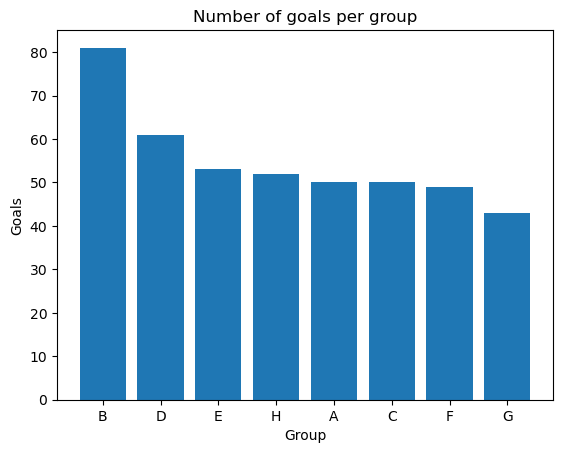

In [52]:
# View in a plot
plt.bar(x = grouped_goals['group'], height = grouped_goals['goals'])
plt.xlabel('Group')
plt.ylabel('Goals')
plt.title('Number of goals per group')
plt.show()

Group B has the highest number of goals (81), while Group G has the lowest number of goals (43) during the group stage of the tournament.

Who are the 10 most-capped players in the FIFA 2018 World Cup?

In [53]:
# Aggregate the data by 'player_name', 'country' and 'caps'
most_capped_players = df_clean.groupby(['player_name', 'country'])['caps'].max().sort_values(ascending=False).reset_index()
# View the first 10
most_capped_10 = most_capped_players.head(10)
most_capped_10

,player_name,country,caps
0,Essam El-Hadary (captain),Egypt,156
1,Sergio Ramos (captain),Spain,151
2,Cristiano Ronaldo (captain),Portugal,149
3,Andrés Guardado (captain),Mexico,144
4,Rafael Márquez,Mexico,143
5,Gabriel Gómez,Panama,142
6,Javier Mascherano,Argentina,142
7,Osama Hawsawi (captain),Saudi Arabia,133
8,Jaime Penedo,Panama,130
9,Taisir Al-Jassim,Saudi Arabia,129


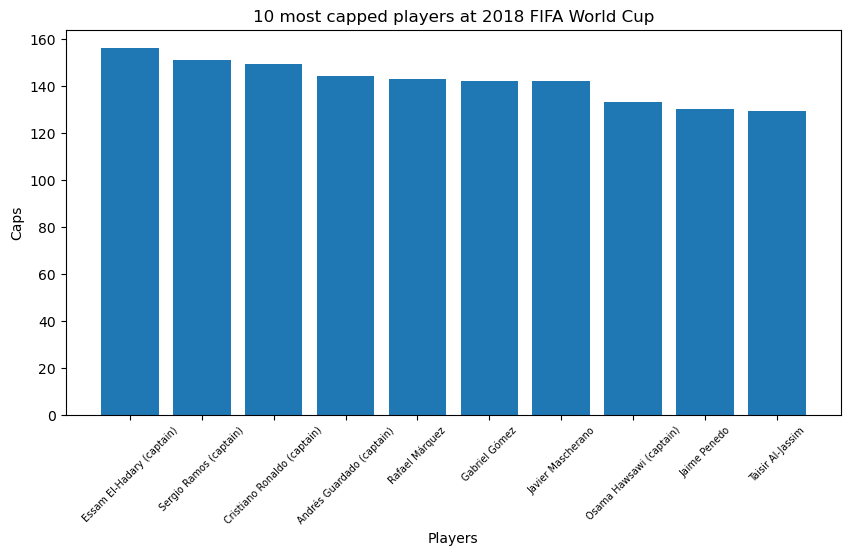

In [54]:
# View in a plot
plt.figure(figsize = (10, 5))
plt.bar(x = most_capped_10['player_name'].head(10), height = most_capped_10['caps'])
plt.xlabel("Players")
plt.ylabel("Caps")
plt.title("10 most capped players at 2018 FIFA World Cup")
plt.xticks(rotation=45, fontsize = 7)
plt.show()

As at 2018 FIFA World Cup, **Essam El-Hadary** was the most capped player for his country (Egypt)

Is there any relationship between players position and number of goals scored?

In [55]:
# Group the data by 'position' and get the max no of goals
goals_position = df_clean.groupby('position')['goals'].max().sort_values(ascending=False).reset_index()
# View
goals_position

,position,goals
0,FW,81
1,MF,36
2,DF,13
3,GK,0


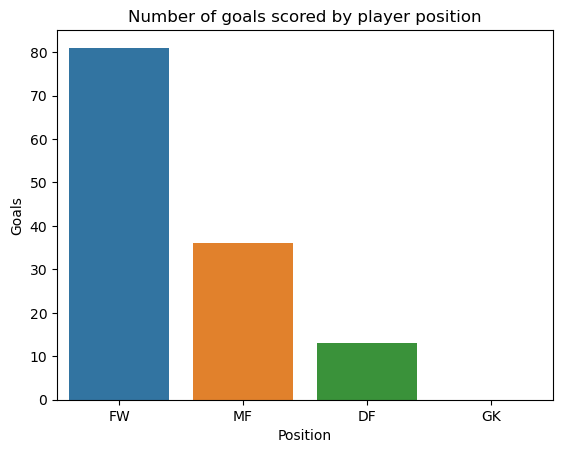

In [56]:
# View the plot
sns.barplot( data = goals_position, x = 'position', y = 'goals')
plt.xlabel("Position")
plt.ylabel("Goals")
plt.title("Number of goals scored by player position")
plt.show()

As predicted, 'FW' position has the highest number of goals scored. Hence, there's a relationship between players position and goals scored. The number of goals reduces as the distance of the players position to the opponent's goal post increases leading to less chances of scoring goals

Is there any correlation between 'goals', 'age' and 'caps'?

In [57]:
# Find the correlation between age & caps
corr_age_caps = df_clean['age'].corr(df_clean['caps'])
corr_age_caps

0.6039082428066177

In [58]:
# Find the correlation between age & goals
corr_age_goals = df_clean['age'].corr(df_clean['goals'])
corr_age_goals

0.2570671683075584

In [59]:
# Find the correlation caps & goals
corr_caps_goals = df_clean['caps'].corr(df_clean['goals'])
corr_caps_goals

0.5780511057388914

There's a positive weak correlation between age, caps and goals but it is  a bit strong between age and caps. This means that, the higher the age of the player, the higher the number of caps he would get for his country. 

But it must be noted as usually stated that **Correlation is not causation**, as there may be other factors responsible for any correlation at all. 

In [60]:
# Check df_clean
df_clean.head()

,country,group,position,player_name,dob,caps,goals,club,yob,age
0,Egypt,A,DF,Ahmed Elmohamady,1987-09-09,76,2,Aston Villa,1987,31
1,Egypt,A,DF,Ahmed Fathy,1984-11-10,124,3,Al Ahly,1984,34
2,Egypt,A,DF,Ahmed Hegazi,1991-01-25,43,1,West Bromwich Albion,1991,27
3,Egypt,A,DF,Ali Gabr,1993-07-28,20,1,West Bromwich Albion,1993,25
4,Egypt,A,DF,Ayman Ashraf,1991-04-09,4,0,Al Ahly,1991,27


In [61]:
# Create a df_corr with 'caps', 'goals', & 'age' columns
df_corr = df_clean[['caps', 'goals', 'age']]
df_corr.head()

,caps,goals,age
0,76,2,31
1,124,3,34
2,43,1,27
3,20,1,25
4,4,0,27


In [62]:
# Save this subset of data for the next phase of the project (ML modelling & prediction)
df_corr.to_excel("model_data_world_cup_2018.xlsx", index=False)

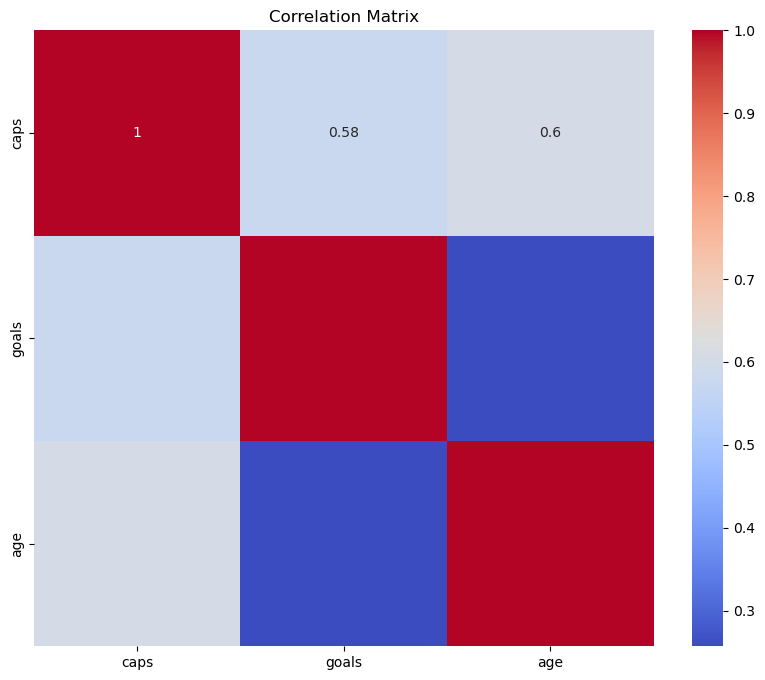

In [63]:
# Plot the correlation matrix
corr_matrix = df_corr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 10})
plt.title("Correlation Matrix")
plt.show()

**Is the Hypothesis true or null?**

Based on the correlation matrix above, it appears that the age attribute has effect on players' caps more than number of goals, so the hypothesis holds true that age has an affect on players' profile as postulated

Which of the clubs has the highest number of players represented at the 2018 world cup?

In [64]:
# Aggregate the data by 'club' and count of 'player_name'
grouped_clubs = df_clean.groupby('club')['player_name'].count().sort_values(ascending=False).reset_index()
grouped_clubs
# View the top 10 clubs with highest no of players represented
top_10_clubs = grouped_clubs.head(10)
top_10_clubs

,club,player_name
0,Manchester City,16
1,Real Madrid,15
2,Barcelona,14
3,Paris Saint-Germain,12
4,Tottenham Hotspur,12
5,Chelsea,11
6,Manchester United,11
7,Bayern Munich,11
8,Juventus,11
9,Arabia Al-Hilal,9


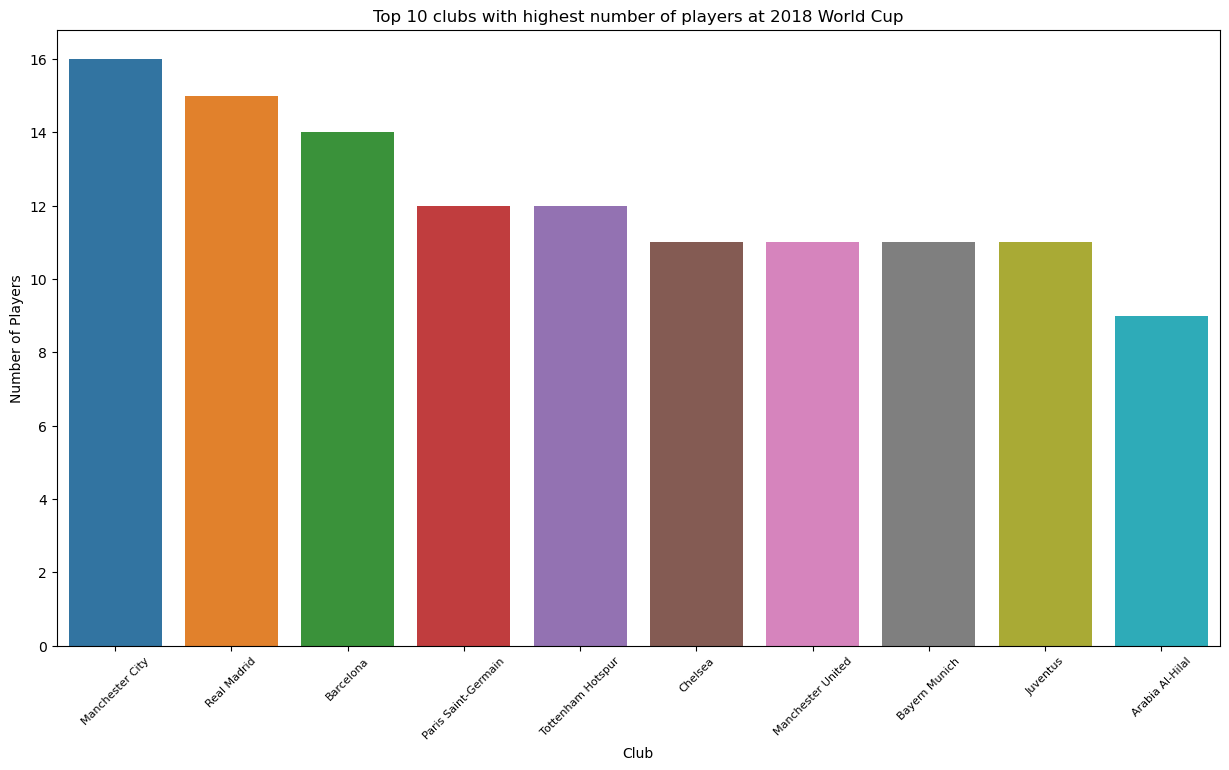

In [65]:
# View in a plot
plt.figure(figsize = (15, 8))
sns.barplot(data = top_10_clubs, x = 'club', y = 'player_name')
plt.xlabel("Club")
plt.ylabel("Number of Players")
plt.title("Top 10 clubs with highest number of players at 2018 World Cup")
plt.xticks(rotation = 45, fontsize = 8)
plt.show()

Manchester City has the highest number of players represented at the 2018 world cup (16 players) with the likes of Real Madrid, Barcelona, PSG, Spurs, Chelsea, Manchester United, Bayern Munich, Juventus, and Arabia Al-Hilal also featuring in the top 10. 

On the basis of this, between 2018 and now (2024), with current data we can lay hands on, we can ascertain if a club has declined or in ascendancy in world football based on the numbers of their players featuring in most recent FIFA World Cups. 

Which country scored the highest number of goals at world cup tournaments to date as at world cup 2018?

In [66]:
# Group the data by country and get the max. no of goals
grouped_country_goals = df_clean.groupby('country')['goals'].max().sort_values(ascending=False).reset_index()
grouped_country_goals

,country,goals
0,Portugal,81
1,Argentina,61
2,Brazil,53
3,Poland,52
4,Japan,50
5,Australia,50
6,Uruguay,50
7,Mexico,49
8,Panama,43
9,Germany,38


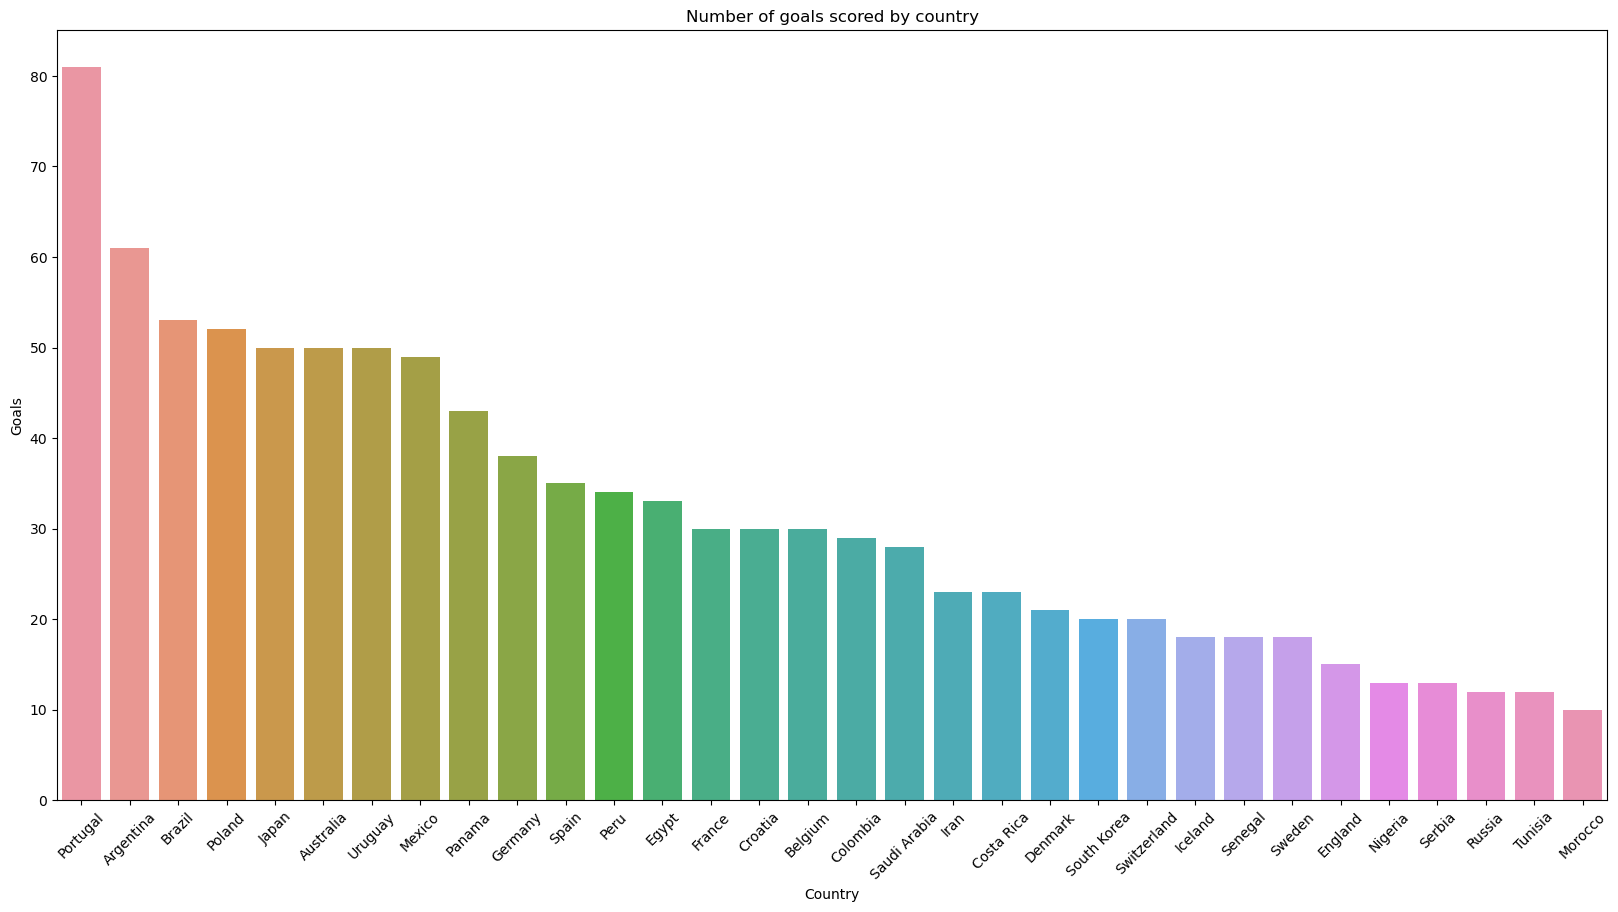

In [67]:
# View in the plot
plt.figure(figsize = (20, 10))
sns.barplot(data = grouped_country_goals, x = 'country', y = 'goals')
plt.xlabel("Country")
plt.ylabel("Goals")
plt.title("Number of goals scored by country")
plt.xticks(rotation = 45, fontsize = 10)
plt.show()

Portugal scored the highest number of goals (81) at the world cup tournaments as at 2018, followed by Argentina (61 goals), while Morocco scored the lowest number of goals (10). 

The goal-outputs of Portugal and Argentina might be connected to the outstanding performances of the 2 best footballers in the world at that time **(Cristiana Ronaldo and Lionel Messi)**.

We'll ascertain this in the next analysis...

Who are the top 5 best players in the world as at 2018, based on number of goals scored by their countries in world cup tournaments to date?

In [68]:
# Group 'player_name' by count of 'goals' 
grouped_players = df_clean.groupby(['player_name', 'country'])['goals'].sum().sort_values(ascending=False).reset_index()
top_5_players_goals = grouped_players.head()
top_5_players_goals

,player_name,country,goals
0,Cristiano Ronaldo (captain),Portugal,81
1,Lionel Messi (captain),Argentina,61
2,Neymar,Brazil,53
3,Robert Lewandowski (captain),Poland,52
4,Tim Cahill,Australia,50


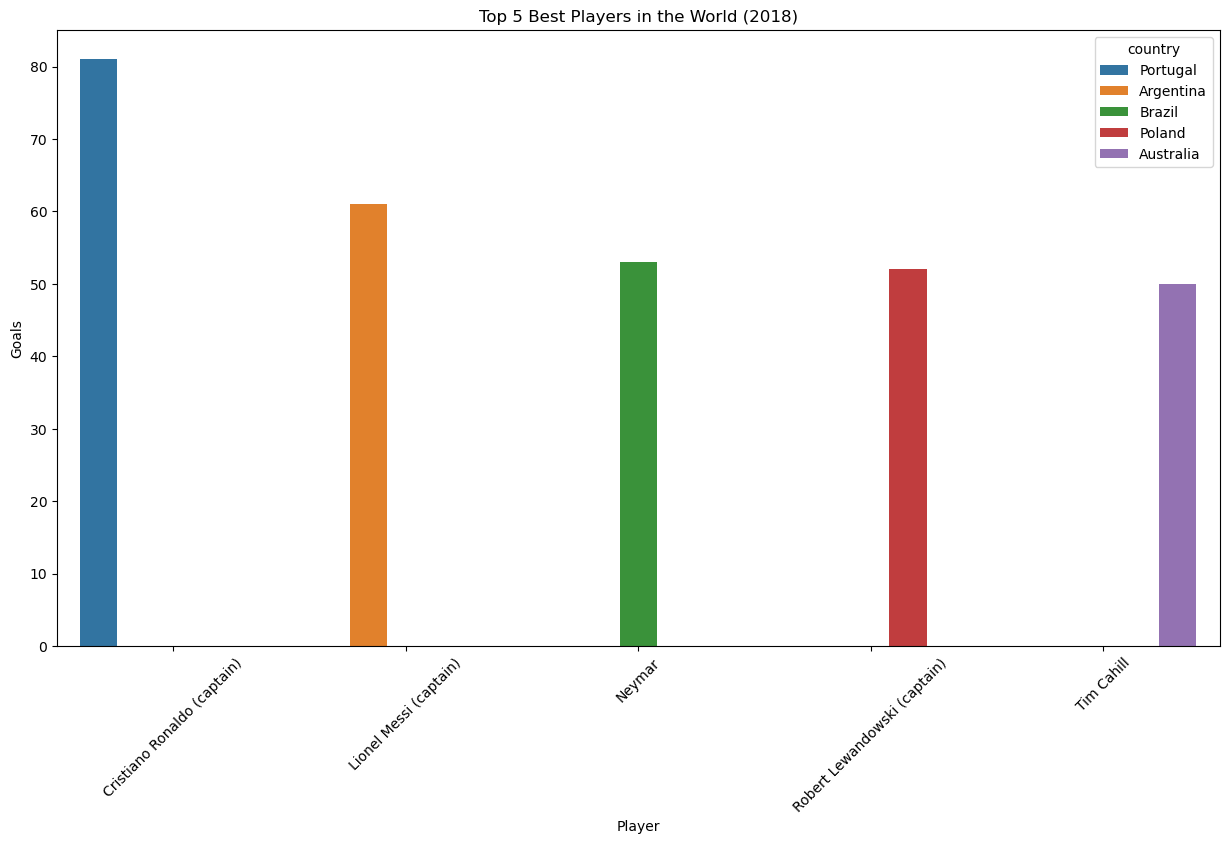

In [69]:
# View the plot
plt.figure(figsize = (15, 8))
sns.barplot(data = top_5_players_goals, x = 'player_name', y = 'goals', hue = 'country')
plt.xlabel("Player")
plt.ylabel("Goals")
plt.xticks(rotation=45, fontsize=10)
plt.title("Top 5 Best Players in the World (2018)")
plt.show()

 The top 5 best players in the world as at 2018, based on their performances at the international competition: 

1. *Cristiano Ronaldo*

2. *Lionel Messi*

3. *Neymar*

4. *Robert Lewandowski*

5. *Tim Cahill*

### 3. Scouting Analysis

 For scouting purposes, we need to identify 5 best player per position based on goals-output and/or number of caps

* 'FW' Position

In [70]:
# Fiter out the 'FW' position
df_fw = df_clean[df_clean['position'] == 'FW']
# Check 
df_fw

,country,group,position,player_name,dob,caps,goals,club,yob,age
9,Egypt,A,FW,Marwan Mohsen,1989-02-26,22,4,Al Ahly,1989,29
10,Egypt,A,FW,Mohamed Salah,1992-06-15,57,33,Liverpool,1992,26
30,Russia,A,FW,Aleksei Miranchuk,1995-10-17,16,4,Lokomotiv Moscow,1995,23
31,Russia,A,FW,Artem Dzyuba,1988-08-22,22,11,Arsenal Tula,1988,30
32,Russia,A,FW,Fyodor Smolov,1990-02-05,30,12,Krasnodar,1990,28
...,...,...,...,...,...,...,...,...,...,...
723,Senegal,H,FW,Mame Biram Diouf,1987-12-16,46,10,Stoke City,1987,31
724,Senegal,H,FW,M'Baye Niang,1994-12-19,4,0,Torino,1994,24
725,Senegal,H,FW,Moussa Konaté,1993-04-03,26,9,Amiens,1993,25
726,Senegal,H,FW,Moussa Sow,1986-01-19,50,18,Bursaspor,1986,32


In [71]:
# Group 'FW' data by player and max goals & caps
grouped_fw = df_fw.groupby('player_name')[['caps', 'goals']]. max().sort_values(by= ['caps', 'goals'], 
                                                                                ascending=False).reset_index()
fw_top5 = grouped_fw.head()
# Check
fw_top5

,player_name,caps,goals
0,Cristiano Ronaldo (captain),149,81
1,Lionel Messi (captain),123,61
2,Blas Pérez,116,43
3,Shinji Okazaki,111,50
4,Bryan Ruiz (captain),109,23


Based on our scouting analysis, the best forward players to scout for by different clubs are: 

* **Cristiano Ronaldo**

* **Lionel Messi**

* **Blas Pérez**

* **Shinji Okazaki**, and 

* **Bryan Ruiz**

* 'MF' Position

In [72]:
# Fiter out the 'MF' position
df_mf = df_clean[df_clean['position'] == 'MF']
# Check
df_mf

,country,group,position,player_name,dob,caps,goals,club,yob,age
14,Egypt,A,MF,Abdallah Said,1985-07-13,34,6,KuPS,1985,33
15,Egypt,A,MF,Amr Warda,1993-09-13,14,0,Atromitos,1993,25
16,Egypt,A,MF,Kahraba,1994-04-13,17,3,Arabia Al Ittihad,1994,24
17,Egypt,A,MF,Mohamed Elneny,1992-07-11,60,5,Arsenal,1992,26
18,Egypt,A,MF,Ramadan Sobhi,1997-01-23,21,1,Stoke City,1997,21
...,...,...,...,...,...,...,...,...,...,...
731,Senegal,H,MF,Alfred N'Diaye,1990-03-06,18,0,Wolverhampton Wanderers,1990,28
732,Senegal,H,MF,Badou Ndiaye,1990-10-27,17,1,Stoke City,1990,28
733,Senegal,H,MF,Cheikh N'Doye,1986-03-29,23,3,Birmingham City,1986,32
734,Senegal,H,MF,Cheikhou Kouyaté (captain),1989-12-21,46,2,West Ham United,1989,29


In [73]:
# Group 'MF' data by player and max goals & caps
grouped_mf = df_mf.groupby('player_name')[['caps', 'goals']].max().sort_values(by=['caps', 'goals'], 
                                                                               ascending=False).reset_index()
mf_top5 = grouped_mf.head()
# Check
mf_top5

,player_name,caps,goals
0,Andrés Guardado (captain),144,25
1,Rafael Márquez,143,18
2,Gabriel Gómez,142,12
3,Taisir Al-Jassim,129,18
4,Andrés Iniesta,125,14


Based on our scouting analysis, the best midfield players to scout for by different clubs are:

* **Andrés Guardado**

* **Rafael Márquez**

* **Gabriel Gómez**

* **Taisir Al-Jassim**, and

* **Andrés Iniesta**

* 'DF' Position

In [74]:
# Fiter out the 'DF' position
df_df = df_clean[df_clean['position'] == 'DF']
# Check
df_df

,country,group,position,player_name,dob,caps,goals,club,yob,age
0,Egypt,A,DF,Ahmed Elmohamady,1987-09-09,76,2,Aston Villa,1987,31
1,Egypt,A,DF,Ahmed Fathy,1984-11-10,124,3,Al Ahly,1984,34
2,Egypt,A,DF,Ahmed Hegazi,1991-01-25,43,1,West Bromwich Albion,1991,27
3,Egypt,A,DF,Ali Gabr,1993-07-28,20,1,West Bromwich Albion,1993,25
4,Egypt,A,DF,Ayman Ashraf,1991-04-09,4,0,Al Ahly,1991,27
...,...,...,...,...,...,...,...,...,...,...
715,Senegal,H,DF,Lamine Gassama,1989-10-20,34,0,Alanyaspor,1989,29
716,Senegal,H,DF,Moussa Wagué,1998-10-04,8,0,Eupen,1998,20
717,Senegal,H,DF,Salif Sané,1990-08-25,19,0,Hannover 96,1990,28
718,Senegal,H,DF,Saliou Ciss,1989-09-15,17,0,Valenciennes,1989,29


In [75]:
# Group 'DF' data by player and max goals & caps
grouped_df = df_df.groupby('player_name')[['caps', 'goals']].max().sort_values(by=['caps', 'goals'], 
                                                                               ascending=False).reset_index()
df_top5 = grouped_df.head()
# Check
df_top5

,player_name,caps,goals
0,Sergio Ramos (captain),151,13
1,Javier Mascherano,142,3
2,Osama Hawsawi (captain),133,7
3,Ahmed Fathy,124,3
4,Maxi Pereira,124,3


Based on our scouting analysis, the best defenders to scout for by different clubs are:

* **Sergio Ramos**

* **Javier Mascherano**

* **Osama Hawsawi**

* **Ahmed Fathy**, and

* **Maxi Pereira**

* 'GK' Position

In [76]:
# Fiter out the 'GK' position
df_gk = df_clean[df_clean['position'] == 'GK']
# Check
df_gk

,country,group,position,player_name,dob,caps,goals,club,yob,age
11,Egypt,A,GK,Essam El-Hadary (captain),1973-01-15,156,0,Arabia Al Taawoun,1973,45
12,Egypt,A,GK,Mohamed El-Shenawy,1988-12-18,1,0,Al Ahly,1988,30
13,Egypt,A,GK,Sherif Ekramy,1983-07-01,22,0,Al Ahly,1983,35
33,Russia,A,GK,Andrey Lunyov,1991-11-13,3,0,Zenit Saint Petersburg,1991,27
34,Russia,A,GK,Igor Akinfeev (captain),1986-04-08,104,0,CSKA Moscow,1986,32
...,...,...,...,...,...,...,...,...,...,...
702,Poland,H,GK,Łukasz Fabiański,1993-07-29,43,0,Swansea City,1993,25
703,Poland,H,GK,Wojciech Szczęsny,1984-01-01,33,0,Juventus,1984,34
728,Senegal,H,GK,Abdoulaye Diallo,1992-03-30,16,0,Rennes,1992,26
729,Senegal,H,GK,Alfred Gomis,1984-05-31,1,0,SPAL,1984,34


In [77]:
# Group 'GK' data by player and max caps
grouped_gk = df_gk.groupby('player_name')['caps'].max().sort_values(ascending=False).reset_index()
gk_top5 = grouped_gk.head()
# Check
gk_top5

,player_name,caps
0,Essam El-Hadary (captain),156
1,Jaime Penedo,130
2,Igor Akinfeev (captain),104
3,Fernando Muslera,96
4,Hugo Lloris (captain),96


Based on our scouting analysis, the best goalkeepers to scout for by different clubs are:

* **Essam El-Hadarys**

* **Jaime Penedo**

* **Igor Akinfeev**

* **Fernando Muslera**, and

* **Hugo Lloris**

### 4. Insights and Recommendations

**Insights**

Here are some of the insights uncovered from the data:

1. *735 players* featured in the 2018 FIFA World Cup (Russia 2018)

2. *Group B* has the highest number of goals scored at the group stahe in the tournament (81 goals)

3. As at 2018 FIFA World Cup, *Essam El-Hadary* was the most capped player in the world.

4. The hypothesis holds true that: *Age attribute has effect on players' caps and number of goals,  but it's effect is more on caps than number of goals.*

5. *Manchester City FC* has the highest number of players represented at the 2018 world cup, with 16 players.

6. *Portugal* scored the highest number of goals (81) at the world cup tournaments **as at 2018**, followed by *Argentina* (61 goals), while *Morocco* scored the lowest number of goals (10). This numbers and rankings might have changed by now.

7. The top 5 best players in the world as at 2018, based on their performances at the international competition: *Cristiano Ronaldo; Lionel Messi; Neymar; Robert Lewandowski, and Tim Cahill*

**Recommendations**

* We may need to get more recent data to compare with this data in order to ascertain the clubs that are in ascendancy or decline since 2018. This will help the stakeholders to make more informed scouting decisions to meet business objectives. 

* It is recommended that  the team moves to the 2nd phase of the project (Develop a Predictive Scouting Model) which will be used to scout for the best footballing talents in the world.

### 5. Conclusion

Personally, I really enjoyed working on this data as soccer is one of the things I am passionate about. Hence, it became so real to me and I was fascinated about many insights I could uncover from this dataset. This has definitely spurred me to look for more sporting datasets which I would be sharing the sequel to this project **(Developing a Predictive ML Model for Scouting Performance)** with this audience soonest.

I hope this is worth your time. 

Follow me on: 

* [LinkedIn](https://www.linkedin.com/in/olumide-olaoye-13381335/), and

* [X](https://www.x.com/olu_olaoye) *@olu_olaoye*

Gracias!